In [1]:
from matplotlib import pyplot as plt
# import b2plot as bp
# plt.style.use('belle2_modern')
# plt.style.use('belle2')


# basic setup of the notebook

import numpy as np

# everything in iminuit is done through the Minuit object, so we import it
from iminuit import Minuit,cost

# we also need a cost function to fit and import the LeastSquares function
from iminuit.cost import LeastSquares

# display iminuit version
import iminuit
print("iminuit version:", iminuit.__version__)

iminuit version: 2.15.2


In [2]:
# plt.style.available
# plt.style.use('belle2_modern')
px = 1/plt.rcParams['figure.dpi']
# plt.figure(figsize=(576*px, 396*px))

In [23]:
from hist.get_data import get_data

Welcome to JupyROOT 6.26/04


In [24]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL
from iminuit.util import describe
from matplotlib import pyplot as plt
import numpy as np
from numba_stats import norm, crystalball

In [25]:
def crystalball_pdf(x, beta, m, loc, scale):
    
    return crystalball.pdf(x, beta, m, loc, scale)

In [26]:
def signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return s, func

In [169]:
def extended_bin_signal_crystalball(x, s, beta, m, loc, scale):
    func = s * crystalball.pdf(x, beta, m, loc, scale)
    return func

In [170]:
file='/media/jykim/ssd_T5/storage/01_recon/antiKstar/v2_all_signalMC_recon_mdst_antiKstar.root'

In [171]:
file='/media/jykim/ssd_T5/storage/01_recon/antiKstar/v2_all_signalMC_recon_mdst_antiKstar.root'
file='/media/jykim/ssd_T5/storage/01_recon/phi/v2_all_signalMC_recon_mdst_phi.root'

variables=['D0_M','Pi0_Prob']
tree = 'antiKstar'
tree = 'phi'

In [172]:
df_antiKstar= get_data(file=file, tree=tree,variables=variables)

In [173]:
df_antiKstar_Pi0veto= get_data(file=file, tree=tree,variables=variables,base_filter='Pi0_Prob<0.9')
df_antiKstar_Pi0veto.describe()

,D0_M,Pi0_Prob
count,76541.000000,7.654100e+04
mean,1.858442,3.197872e-01
std,0.021454,2.877266e-01
min,1.665261,2.669249e-07
25%,1.849710,5.106067e-02
50%,1.861044,2.527811e-01
75%,1.870518,5.501136e-01
max,2.064014,8.999168e-01


In [174]:
# COST = cost.LeastSquares( )

In [175]:
# COST = cost.ExtendedUnbinnedNLL(df_antiKstar_Pi0veto['D0_M'], crystalball_pdf)

In [176]:
# COST = cost.UnbinnedNLL(df_antiKstar_Pi0veto['D0_M'], crystalball_pdf)


# COST = cost.ExtendedUnbinnedNLL(df_antiKstar_Pi0veto['D0_M'], signal_crystalball)
COST = cost.ExtendedBinnedNLL(n,xe, extended_bin_signal_crystalball)

In [177]:
# m = Minuit(COST, beta=1, m=1.86, loc=1, scale=1)
m = Minuit(COST, s=70000,beta=1, m=1.86, loc=1, scale=1)


In [178]:
m.limits["s","beta", "m", "loc","scale"] = (0, None)
m.migrad()
#m.interactive()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.151e+08 (chi2/ndof = 2557324.7)│              Nfcn = 120              │
│ EDM = 0 (Goal: 0.0002)           │            time = 0.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │   Hesse FAILED   │APPROXIMATE│NOT pos. def.│ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ s     │    7e4    │    0e4    │            │            │    0    │         │       │
│ 1 │ beta  │   10e-1   │   0e-1    │            │            │    0    │         │       │
│ 2 │ m     │   1.86    │   0.00    │            │            │    0    │         │       │
│ 3 │ loc   │   10e-1   │   0e-1    │            │            │    0    │         │       │
│ 4 │ scale │   10e-1   │   0e-1    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

In [179]:
# plt.plot(data.x, model(data.x, *m.values[:]), label="model")

m.minos()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=0.0 edm_goal=0.0002 errordef=1.0 fval=115079611.51233216 has_accurate_covar=False has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=False has_reached_call_limit=False has_valid_parameters=False hesse_failed=True is_above_max_edm=False is_valid=False nfcn=120 ngrad=0 reduced_chi2=2557324.700274048 time=0.3514376179991814>

In [180]:
m.interactive()

In [181]:
plt.plot(xm, crystalball_pdf(xm,*m.values))

TypeError: crystalball_pdf() takes 5 positional arguments but 6 were given

In [182]:
px = 1/plt.rcParams['figure.dpi']

In [183]:
n, xe = np.histogram(df_antiKstar_Pi0veto['D0_M'], bins=50, range=(1.665,2.065))

In [184]:
cx = 0.5 * (xe[1:] + xe[:-1])

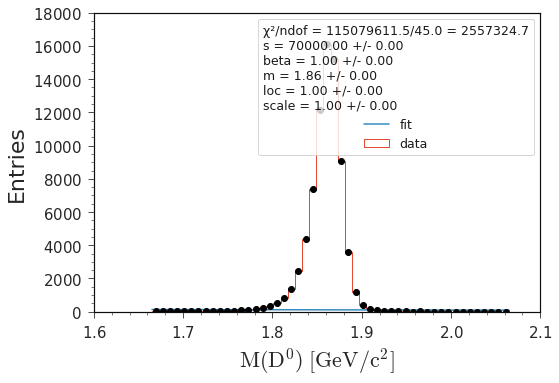

In [188]:


fig = plt.figure(figsize=(576*px, 396*px))
# import b2plot as bp
# plt.style.use('belle2_modern')
xrange = (1.665,2.065, 400)
xm = np.linspace(*xrange)
dx = 0.4/50

plt.errorbar(cx, n, n ** 0.5, fmt="ok")
plt.plot(xm, signal_crystalball(xm, *m.values)[1] * dx,label="fit")
plt.hist( df_antiKstar_Pi0veto['D0_M'],bins=50, range=(1.665,2.065), label="data", density=False,histtype='step',)

# m.fval is only chi2 if cost function supports that
# telltale sign: m.ndof returns something finite and not None
chi2 = m.fval
ndof = m.ndof

title = [
    f"χ²/ndof = {chi2:.1f}/{ndof} = {chi2/ndof:.1f}",
]
for par in m.parameters:
    title.append(
        f"{par} = {m.values[par]:.2f} +/- {m.errors[par]:.2f}"
    )

plt.rcParams['legend.title_fontsize'] = 'small'
plt.legend(title="\n".join(title) , frameon=True, shadow=False, fontsize='small')

plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
plt.ylabel("Entries");



In [86]:
n

array([   12,    20,    13,    18,    15,    35,    33,    16,    36,
          37,    64,    71,    81,   119,   159,   230,   346,   502,
         812,  1388,  2455,  4375,  7409, 12142, 16109, 15236,  9097,
        3617,  1187,   417,   175,    80,    41,    46,    33,    15,
          11,    17,     8,    11,    11,     5,     5,     6,     4,
           8,     1,     4,     4,     5])

In [129]:
xe

array([1.665, 1.673, 1.681, 1.689, 1.697, 1.705, 1.713, 1.721, 1.729,
       1.737, 1.745, 1.753, 1.761, 1.769, 1.777, 1.785, 1.793, 1.801,
       1.809, 1.817, 1.825, 1.833, 1.841, 1.849, 1.857, 1.865, 1.873,
       1.881, 1.889, 1.897, 1.905, 1.913, 1.921, 1.929, 1.937, 1.945,
       1.953, 1.961, 1.969, 1.977, 1.985, 1.993, 2.001, 2.009, 2.017,
       2.025, 2.033, 2.041, 2.049, 2.057, 2.065])

In [19]:
xrange = (1.665,2.065, 4899)
xm = np.linspace(*xrange)
#plt.plot(xm, crystalball_pdf(xm, *[p.value for p in m.init_params]) * len(xmix) * dx[0],
#          ls=":", label="init")

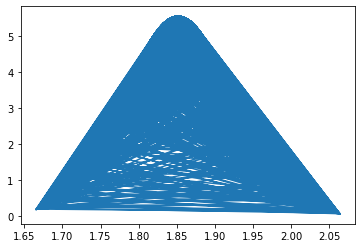

In [51]:
plt.plot(df_antiKstar['D0_M'], crystalball_pdf(df_antiKstar['D0_M'],*m.values))

In [48]:
#plt.errorbar(cx, n, n ** 0.5, fmt="ok")
xm = np.linspace(*xr)
plt.plot(xm, pdf(xm, *[p.value for p in m.init_params]) * len(xmix) * dx[0],
         ls=":", label="init")
plt.plot(xm, pdf(xm, *m.values) * len(xmix) * dx[0], label="fit")
plt.legend();

NameError: name 'xr' is not defined

In [31]:
print(np.linspace(1.665,2.065))

[1.665      1.67316327 1.68132653 1.6894898  1.69765306 1.70581633
 1.71397959 1.72214286 1.73030612 1.73846939 1.74663265 1.75479592
 1.76295918 1.77112245 1.77928571 1.78744898 1.79561224 1.80377551
 1.81193878 1.82010204 1.82826531 1.83642857 1.84459184 1.8527551
 1.86091837 1.86908163 1.8772449  1.88540816 1.89357143 1.90173469
 1.90989796 1.91806122 1.92622449 1.93438776 1.94255102 1.95071429
 1.95887755 1.96704082 1.97520408 1.98336735 1.99153061 1.99969388
 2.00785714 2.01602041 2.02418367 2.03234694 2.0405102  2.04867347
 2.05683673 2.065     ]


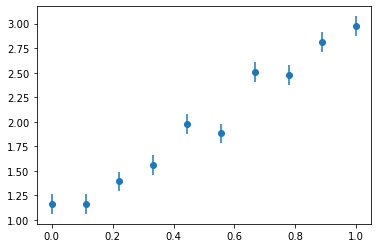

In [9]:
# our line model, unicode parameter names are supported :)
def line(x, α, β):
    return α + x * β




# generate random toy data with random offsets in y
np.random.seed(1)
data_x = np.linspace(0, 1, 10)
data_yerr = 0.1  # could also be an array
data_y = line(data_x, 1, 2) + data_yerr * np.random.randn(len(data_x))

# draw toy data
plt.errorbar(data_x, data_y, data_yerr, fmt="o");

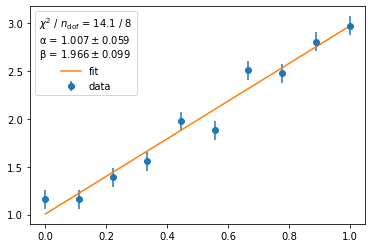

In [4]:
# iminuit contains a LeastSquares class to conveniently generate a least-squares cost function.
# We will revisit how to write this by hand in a later section.
least_squares = LeastSquares(data_x, data_y, data_yerr, line)

m = Minuit(least_squares, α=0, β=0)  # starting values for α and β

m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties

# draw data and fitted line
plt.errorbar(data_x, data_y, data_yerr, fmt="o", label="data")
plt.plot(data_x, line(data_x, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}",
]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")

plt.legend(title="\n".join(fit_info));